# ! Introduction
- This tool is under preparing published.
- The main functions are extended from basic process mining functions developed by Timo Nolle [1].
- The purpose of this tool is to simulate/observe improvement by change of facilities in manufactures.

[1] https://github.com/tnolle/binet

In [1]:
import os
import sys
sys.path.append("..")
import pandas as pd
import numpy as np
from tqdm import tqdm

from GreenBPM.simulation import EventLogGenerator
from GreenBPM.process_modeling import ProcessMap
from GreenBPM.dir import *
from GreenBPM.trace import *


import networkx as nx
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/NGULIM.TTF").get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# 0. The framework

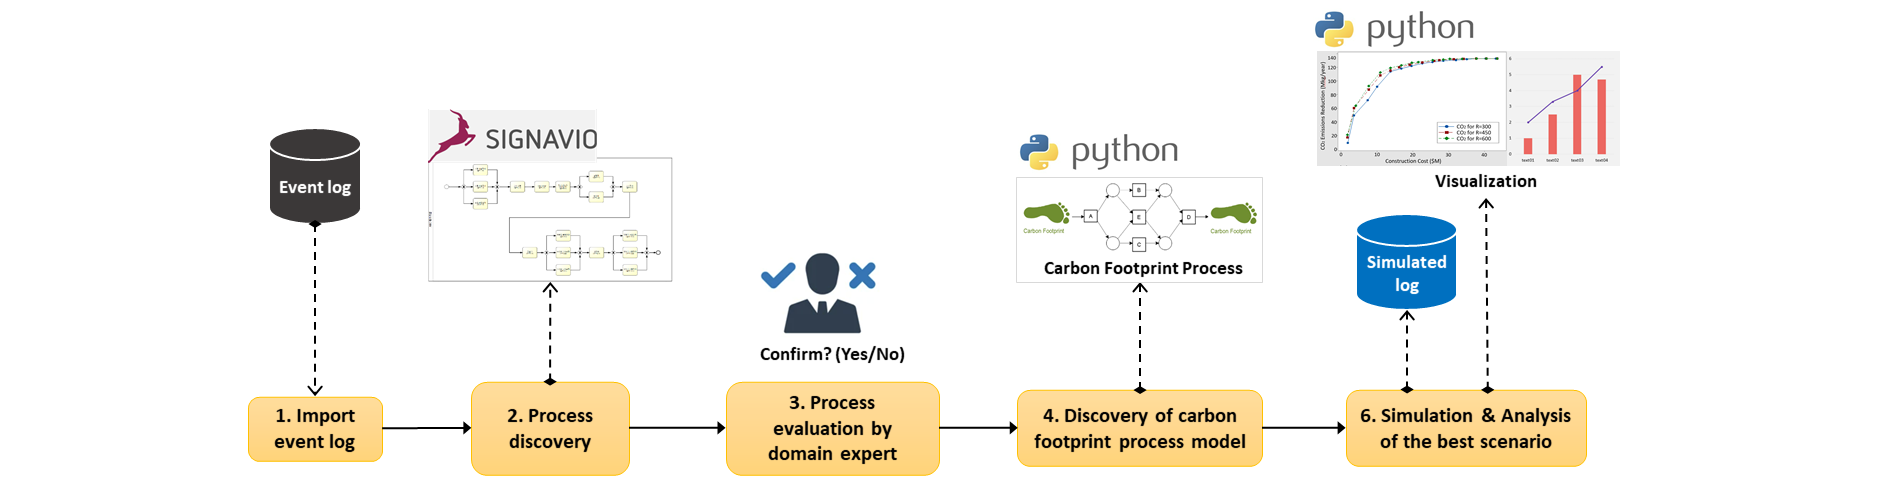

In [2]:
from IPython.display import Image, display
display(Image(str(IMG_DIR / 'framework_eng.png'), width=1200))

# 1. Data Import (Manufacturing Process Event Log  + Process Model)

In [3]:
process_data = pd.read_csv(str(CSV_DIR / "artificial_log_manufacturing(before)_eng_v6.csv"), engine='python')
process_map = ProcessMap.from_plg('manufacturing_eng_v2')

In [4]:
show = process_data[['Case_ID', 'Activity', 'Start_Timestamp', 'Complete_Timestamp', 'Worker' ,'Machine_Elec',
                     'kW', 'Machine_Steam', 'Machine_LPG', 'Machine_Diesel', 'Machine_Gasoline', 'Machine_Kerosene',
                     'Heat', 'Waste' ]]
show.head()

,Case_ID,Activity,Start_Timestamp,Complete_Timestamp,Worker,Machine_Elec,kW,Machine_Steam,Machine_LPG,Machine_Diesel,Machine_Gasoline,Machine_Kerosene,Heat,Waste
0,0,Base Mixer (MachineA.3),2022-09-01 9:00,2022-09-01 9:10,1,MachineA.3,30,NaN,NaN,NaN,NaN,Boiler.1,8,9
1,2,Base Mixer (MachineA.3),2022-09-01 9:30,2022-09-01 9:40,1,MachineA.3,30,NaN,NaN,NaN,NaN,Boiler.1,8,9
2,4,Base Mixer (MachineA.3),2022-09-01 10:00,2022-09-01 10:10,1,MachineA.3,30,NaN,NaN,NaN,NaN,Boiler.1,8,9
3,7,Base Mixer (MachineA.3),2022-09-01 10:45,2022-09-01 10:55,1,MachineA.3,30,NaN,NaN,NaN,NaN,Boiler.1,8,9
4,8,Base Mixer (MachineA.3),2022-09-01 11:00,2022-09-01 11:10,1,MachineA.3,30,NaN,NaN,NaN,NaN,Boiler.1,8,9


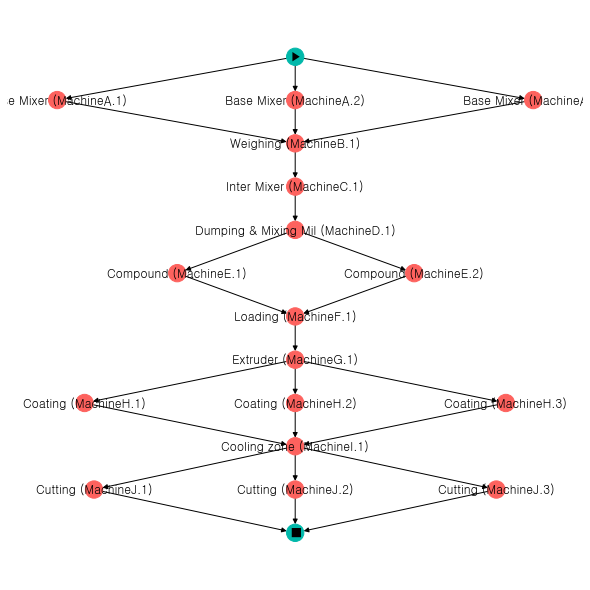

In [5]:
process_map.plot_process_map()

# 2. Discovery of Carbon Foot-print Process Model

Total period: 52.229166666666664 days


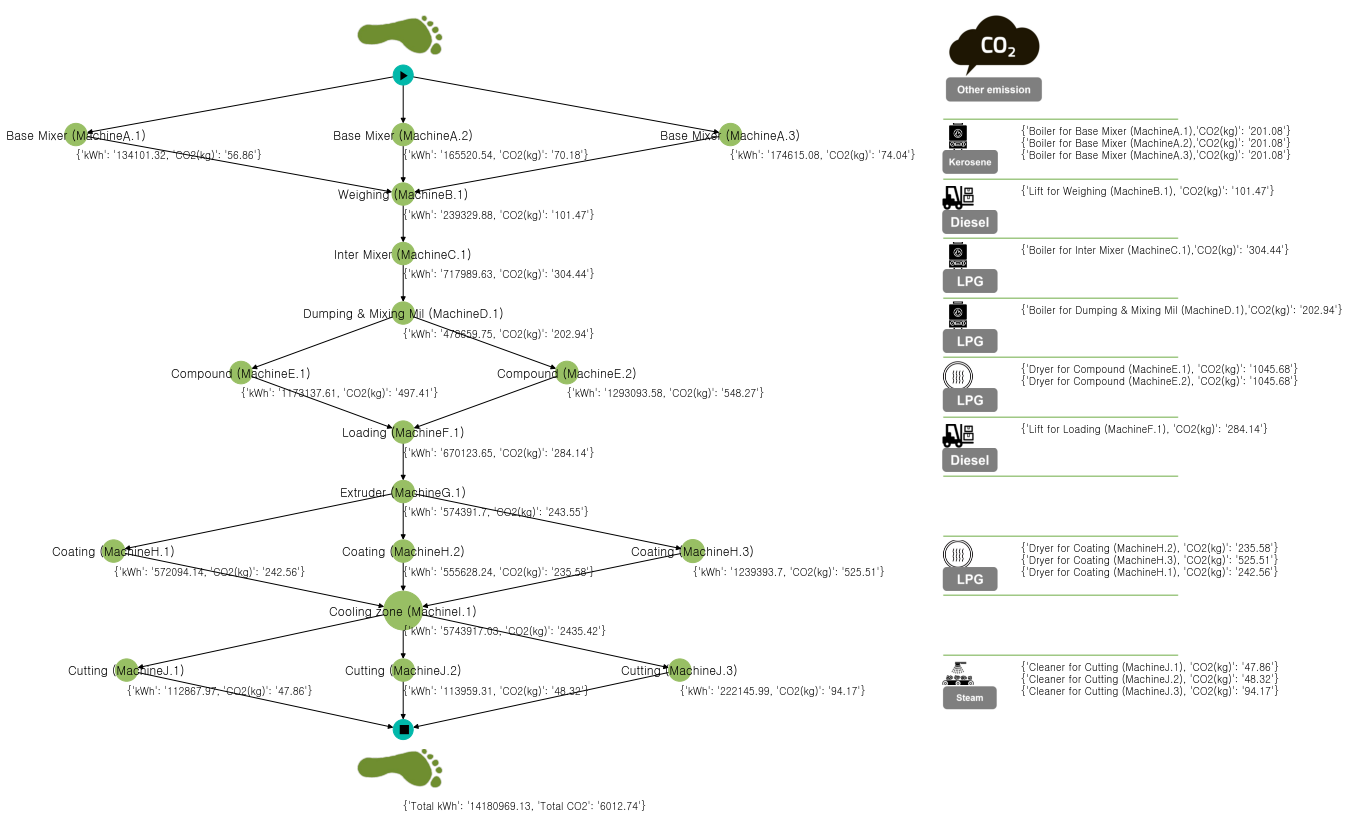

In [6]:
process_map.plot_process_map_GreenBPM(process_data, name ="Before")


# 3. Simulation (Before/After the improvement of facilities)

In [7]:
# Parameters for improved facilities

parameters = [
    dict(Machine_Elec='MachineE.2', attributes=dict({'kWh': 40, 
                                                'duration': 20})),
    dict(Machine_Elec='MachineH.3', attributes=dict({'kWh': 30, 
                                                'duration': 30})),
    dict(Machine_Elec='MachineI.1', attributes=dict({'kWh': 40, 
                                                'duration': 45}))
]

parameters

[{'Machine_Elec': 'MachineE.2', 'attributes': {'kWh': 40, 'duration': 20}},
 {'Machine_Elec': 'MachineH.3', 'attributes': {'kWh': 30, 'duration': 30}},
 {'Machine_Elec': 'MachineI.1', 'attributes': {'kWh': 40, 'duration': 45}}]

In [8]:
# Implement simulation

process_model = 'manufacturing_eng_v2'  # name of updated process model
result = EventLogGenerator.generate_for_process_model(process_model, process_data, parameters, size=5000, seed=1337)

result.to_csv(str(OUTPUT_CSV_DIR / "simulated_log_manufacturing.csv"), index= False)
result.head(10)

Generate event log: 100%|██████████| 5000/5000 [00:01<00:00, 2736.73it/s]


,Case_ID,Activity,Order,Machine_Elec,kW,duration,Machine_Steam,Machine_LPG,Machine_Diesel,Machine_Gasoline,Machine_Kerosene,Heat,Waste,Worker,carbon_reduction_device,kWh
0,1.0,Base Mixer (MachineA.1),0.0,MachineA.1,20,10.0,NaN,NaN,NaN,NaN,Boiler.1,9,5,2,253,NaN
1,1.0,Weighing (MachineB.1),1.0,MachineB.1,25,5.0,NaN,NaN,Lift.1,NaN,NaN,8,8,4,217,NaN
2,1.0,Inter Mixer (MachineC.1),2.0,MachineC.1,25,15.0,NaN,Boiler.2,NaN,NaN,NaN,8,5,3,279,NaN
3,1.0,Dumping & Mixing Mil (MachineD.1),3.0,MachineD.1,25,10.0,NaN,Boiler.3,NaN,NaN,NaN,6,8,1,204,NaN
4,1.0,Compound (MachineE.2),4.0,MachineE.2,46,20.0,NaN,Dryer.1,NaN,NaN,NaN,7,7,4,258,40.0
5,1.0,Loading (MachineF.1),5.0,MachineF.1,35,10.0,NaN,NaN,Lift.2,NaN,NaN,9,8,3,231,NaN
6,1.0,Extruder (MachineG.1),6.0,MachineG.1,15,20.0,NaN,NaN,NaN,NaN,NaN,5,5,4,201,NaN
7,1.0,Coating (MachineH.1),7.0,MachineH.1,25,40.0,NaN,Dryer.2,NaN,NaN,NaN,5,6,3,265,NaN
8,1.0,Cooling zone (MachineI.1),8.0,MachineI.1,50,45.0,NaN,NaN,NaN,NaN,NaN,6,8,3,235,40.0
9,1.0,Cutting (MachineJ.3),9.0,MachineJ.3,15,25.0,Cleaner.3,NaN,NaN,NaN,NaN,6,6,1,282,NaN


# 4. Simulation Results

In [9]:
artificial_log_manufacturing_after = pd.read_csv(str(OUTPUT_CSV_DIR / "simulated_log_manufacturing.csv"), engine='python')

Total period: 52 days


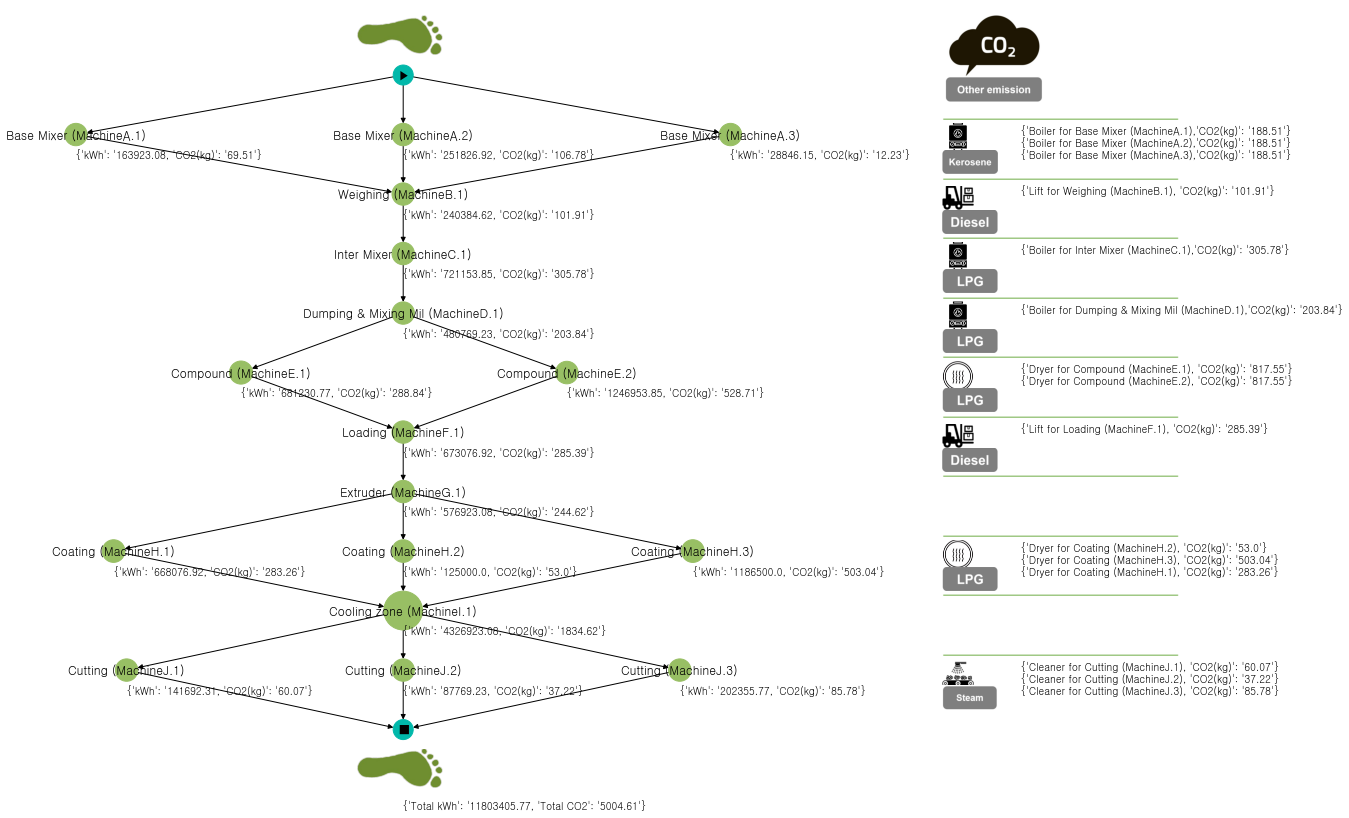

In [10]:
# Process model after improvement
process_map.plot_process_map_GreenBPM(artificial_log_manufacturing_after, name = "After")

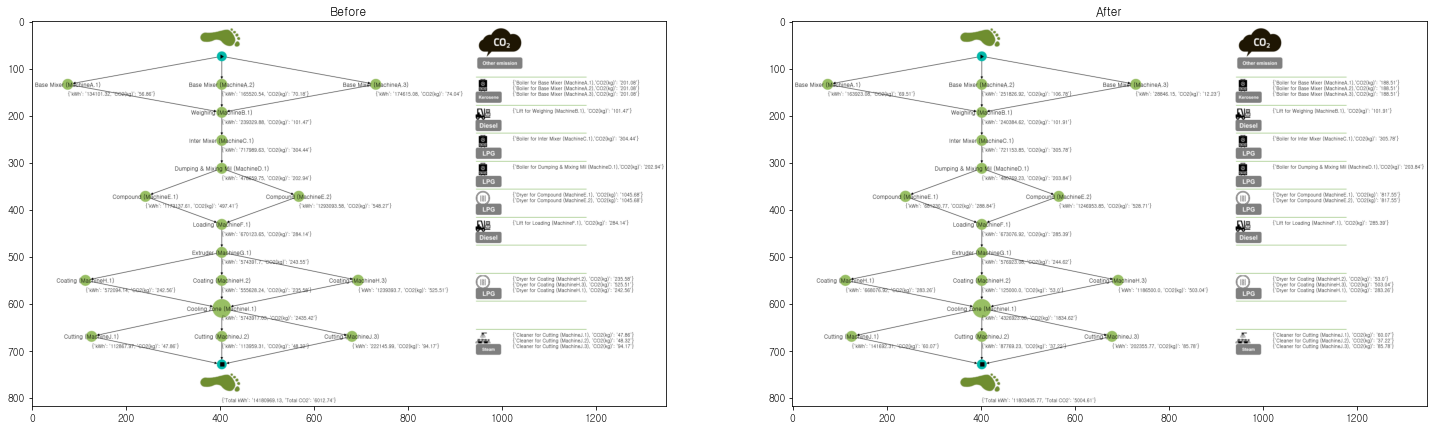

In [11]:
from GreenBPM.dir import PLOT_DIR
import matplotlib.image as mpimg

plt.figure(figsize=(25, 25))
before = mpimg.imread(str(PLOT_DIR / 'Before.png'))
after = mpimg.imread(str(PLOT_DIR / 'After.png'))

plt.subplot(221)
plt.imshow(before)
plt.title('Before')

plt.subplot(222)
plt.imshow(after)
plt.title('After')
plt.show()